In [1]:
from blip2_run import clip2_baseline
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import torch
import numpy as np
import PIL
from torchvision import transforms

In [2]:
model = clip2_baseline.load_from_checkpoint(checkpoint_path="/Users/jonathanlin/Documents/GitHub/research_transfer/temp.ckpt")

In [3]:
csv_path = "/Users/jonathanlin/Documents/GitHub/research_transfer/data_tools/ak_ar_images/train.csv"

df = pd.read_excel("/Users/jonathanlin/Documents/GitHub/research_transfer/datasets/Animal_Kingdom/action_recognition/annotation/df_action.xlsx")

f = open("/Users/jonathanlin/Documents/GitHub/research_transfer/data_tools/ak_ar_images/converted.json", "r")
convert = json.load(f)
f.close()

cwd = "/Users/jonathanlin/Documents/GitHub/research_transfer/"
img_path = cwd + "datasets/Animal_Kingdom/action_recognition/dataset/image/"

frame = pd.read_csv(csv_path)

# for i in range(3):
#     idx = random.randint(0, len(frame))

idx = 130

# fig, axes = plt.subplots(1, 3, figsize=(18, 4))

img_name = os.path.join(img_path, frame.iloc[idx, 0])
label = frame.iloc[idx, 1].split(",")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

raw_num = []
for l in label:
    raw_num.append(convert[l])

actions = []
for raw in raw_num:
    actions.append(df.at[raw, "action"])

print(actions)

image = PIL.Image.open(img_name, mode="r")
image = transform(image)
image = torch.reshape(image, (3, 224, 224))
# image = torch.tensor(image)
image = image.to(torch.float32)
image2 = image.clone()
# print(image.shape)
# image = image.unsqueeze(0)
# new = torch.unsqueeze(image, 0)
new = torch.stack((image, image2), dim=0)
print(new.shape)

y_hat = model(new)
print(y_hat.shape)

actions = []

for i, x in enumerate(y_hat[0]):
    if y_hat[0][i] != 0:
        actions.append(convert[str(i)])
        # print(convert[str(i)])

for action in actions:
    print(df.at[action, "action"])

print(y_hat)

# for i, x in enumerate(y_hat[0]):
#     if y_hat[0][i] != 0:
#         print("hi")

# print(img_name)
# print(raw_num)
# print(actions)

['Attending', 'Keeping still', 'Sensing', 'Chirping']
torch.Size([2, 3, 224, 224])


RuntimeError: Placeholder storage has not been allocated on MPS device!

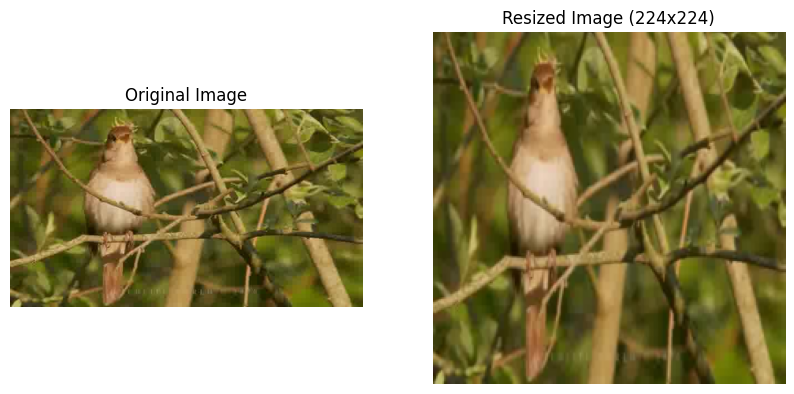

In [ ]:
# Path to the image file
image_path = "path/to/your/image.jpg"

# Load the original image
original_image = PIL.Image.open(img_name, mode="r")

# Define the resize transformation
resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Apply the resize transformation to the image
resized_image = resize_transform(original_image)

# Create a figure and plot the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Convert the resized tensor back to a PIL image
resized_image_pil = transforms.ToPILImage()(resized_image)

axes[1].imshow(resized_image_pil)
axes[1].set_title("Resized Image (224x224)")
axes[1].axis("off")

# Display the figure
plt.show()